In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
raw_data = pd.read_csv("/Users/avanish/Downloads/bestsellers with categories.csv")

In [21]:
raw_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [23]:
raw_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [24]:
raw_data.drop("Name", axis=1, inplace=True)

In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       550 non-null    object 
 1   User Rating  550 non-null    float64
 2   Reviews      550 non-null    int64  
 3   Price        550 non-null    int64  
 4   Year         550 non-null    int64  
 5   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 25.9+ KB


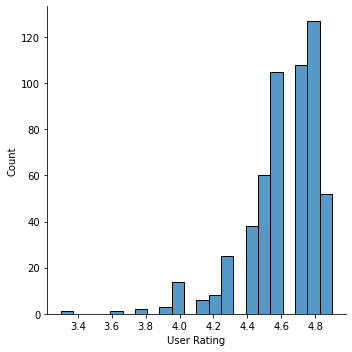

In [26]:
sns.displot(raw_data["User Rating"])

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User Rating'>

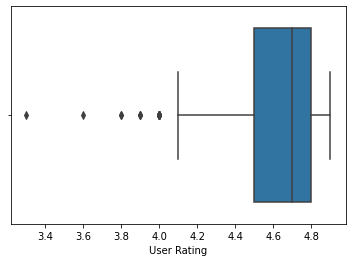

In [27]:
sns.boxplot(raw_data["User Rating"])

In [28]:
raw_data["User Rating"].quantile(0.1)

4.3

In [29]:
data_prep = raw_data.loc[(raw_data["Price"] < raw_data["Price"].quantile(0.98)) & (raw_data["User Rating"] > raw_data["User Rating"].quantile(0.01)) & (raw_data["Reviews"] < raw_data["Reviews"].quantile(0.97)) ]

In [30]:
data_prep.describe()

,User Rating,Reviews,Price,Year
count,512.000000,512.000000,512.000000,512.000000
mean,4.634961,10502.916016,11.746094,2014.005859
std,0.199335,8302.943829,7.140331,3.207435
min,4.000000,37.000000,0.000000,2009.000000
25%,4.500000,3820.000000,7.000000,2011.000000
50%,4.700000,7814.500000,10.000000,2014.000000
75%,4.800000,16001.750000,15.000000,2017.000000
max,4.900000,36348.000000,42.000000,2019.000000


In [31]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       512 non-null    object 
 1   User Rating  512 non-null    float64
 2   Reviews      512 non-null    int64  
 3   Price        512 non-null    int64  
 4   Year         512 non-null    int64  
 5   Genre        512 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 28.0+ KB


In [15]:
data_prep.drop("Name", axis=1, inplace=True)

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
data_prep.drop("Author", axis=1, inplace=True)

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 549
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User Rating  512 non-null    float64
 1   Reviews      512 non-null    int64  
 2   Price        512 non-null    int64  
 3   Year         512 non-null    int64  
 4   Genre        512 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.0+ KB


In [34]:
data_enc = pd.get_dummies(data_prep, drop_first = True)

In [35]:
data_enc

,User Rating,Reviews,Price,Year,Genre_Non Fiction
0,4.7,17350,8,2016,1
1,4.6,2052,22,2011,0
2,4.7,18979,15,2018,1
3,4.7,21424,6,2017,0
4,4.8,7665,12,2019,1
...,...,...,...,...,...
545,4.9,9413,8,2019,0
546,4.7,14331,8,2016,1
547,4.7,14331,8,2017,1
548,4.7,14331,8,2018,1


In [36]:
y = data_enc["User Rating"]

In [37]:
y

0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 512, dtype: float64

In [38]:
X = data_enc.drop(["User Rating"], axis = 1)

In [39]:
X

,Reviews,Price,Year,Genre_Non Fiction
0,17350,8,2016,1
1,2052,22,2011,0
2,18979,15,2018,1
3,21424,6,2017,0
4,7665,12,2019,1
...,...,...,...,...
545,9413,8,2019,0
546,14331,8,2016,1
547,14331,8,2017,1
548,14331,8,2018,1


In [40]:
from sklearn.preprocessing import MinMaxScaler

cols = []

for col in X.columns:
    cols.append(col)
    

num_features = cols
scaler = MinMaxScaler(feature_range = (0,1))


X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Reviews,Price,Year,Genre_Non Fiction
0,0.476798,0.190476,0.7,1.0
1,0.055493,0.523810,0.2,0.0
2,0.521660,0.357143,0.9,1.0
3,0.588995,0.142857,0.8,0.0
4,0.210074,0.285714,1.0,1.0


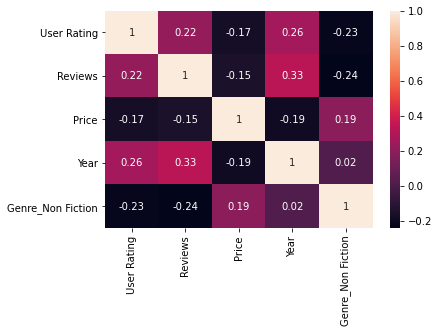

In [41]:
corr_mat = data_enc.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
vif_test = X
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

             feature       VIF
0            Reviews  2.636878
1              Price  2.563919
2               Year  3.229829
3  Genre_Non Fiction  2.317381


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [45]:
from sklearn import linear_model

In [46]:
regr = linear_model.LinearRegression()

In [51]:
regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat))))
print("R2: " + str(r2_score(y_test, y_hat)))

Mean Absolute Error: 0.1250561331759492
Mean Square Error: 0.028805491835403443
Root Mean Square Error: 0.16972180718871527
R2: 0.20126120522269975


In [53]:
from sklearn.tree import DecisionTreeRegressor

regr_tree_2 = DecisionTreeRegressor(max_depth=2)
regr_tree_2.fit(X, y)
y_hat_tree_2 = regr_tree_2.predict(X_test)

In [54]:
print("Decision Tree with depth 2:")
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat_tree_2)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat_tree_2)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat_tree_2))))
print("R2: " + str(r2_score(y_test, y_hat_tree_2)))

Decision Tree with depth 2:
Mean Absolute Error: 0.13103263422034717
Mean Square Error: 0.02954095639967735
Root Mean Square Error: 0.17187482770806595
R2: 0.1808677301511319
